<center>
<h style="line-height: 0.5;">

# Applying Machine Learning to Gravitational Lens Modeling
#### <ins>Research Advisor</ins>: Professor Charles Keeton
#### <ins>Student</ins>: Satyajit Gade

</h>
</center>

In [35]:
# imports all the modules needed

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import emcee
import corner
import arviz
import pygravlens as gl
from astropy.cosmology import Planck18 as cosmo

from matplotlib.patches import Arc

### Generating Corner/Scatter Plots

In [36]:
# Dr. Keeton's code:

def visualize_data(dataarray,colorindex,labels,title):
    f,ax = plt.subplots(4,4,figsize=(16,16))
    f.suptitle(title,fontsize=16)
    for i1 in range(4):
        for i2 in range(4):
            if i2<=i1:
                ax[i1][i2].scatter(dataarray[:,i2],dataarray[:,i1+1],c=dataarray[:,colorindex],marker='o')
                ax[i1][i2].set_xlabel(labels[i2], fontsize=14)
                ax[i1][i2].set_ylabel(labels[i1+1], fontsize=14)
            else:
                ax[i1][i2].axis('off')
    ax[0][1].text(0.5,0.5,'color: '+labels[colorindex],ha='center',va='center', fontsize=14)
    f.tight_layout()
    plt.show()

### Shear Only

In [37]:
vals_shear = np.load('valShear.npy', allow_pickle = True)

In [38]:
# printing out specificed dictionary values for img, magnification, and time-delay arrays
for i in range(len(vals_shear)):
    print('Here is the image array: \n', vals_shear[i]["img"], '\n')
    print('Here is the magnification array: \n', vals_shear[i]["mu"], '\n')
    print('Here is the time delay array: \n', vals_shear[i]["time"], '\n')
    '''
    print('Here is the ellip_c array: \n', values[i]["ellipc"], '\n')
    print('Here is the ellip_s array: \n', values[i]["ellips"], '\n')
    print('Here is the gamma_c array: \n', values[i]["gammc"], '\n')
    print('Here is the gamma_s array: \n', values[i]["gamms"], '\n')
    print()
    '''
    print('----------------------------Next Mock Lens----------------------------')
    
# note that the values dictionary contains i elements where i represents the number of mock lenses

# now we define a separate dictionary containing keys as "single," "double," or "quad" 
# with values as the index of the mock lens for single, double, and quad lenses respectively

single = [];
double = [];
quad = [];

weirdCase = []
for i in range(len(vals_shear)):
    size = len(vals_shear[i]["img"]);
    neither = {}
    if size == 4:
        quad.append(i)
    elif size == 2:
        double.append(i)
    elif size == 1:
        single.append(i)
    else:
        neither = dict(index = i, size = size)
    weirdCase.append(neither)

typeLens = dict(single = single, double = double, quad = quad)

print("The index array for a single image producing mock lens is: ", typeLens["single"],'\n')
print("The index array for a double image producing mock lens is: ", typeLens["double"],'\n')
print("The index array for a quad image producing mock lens is: ", typeLens["quad"],'\n')

for j in weirdCase:
    sz = len(j)
    if sz != 0:
        print("The index for neither single, double, or quad is: ", j["index"],'\n')
        print("And the images produced by this lens are: ", j["size"],'\n')
        print('----------------------------Next Non Single, Double, or Quad Mock Lens----------------------------')

Here is the image array: 
 [[ 1.37627685  0.47099349]
 [-0.4484084  -0.41856401]] 

Here is the magnification array: 
 [ 3.7561872  -1.17949093] 

Here is the time delay array: 
 [ 0.         73.23983724] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.38341651  0.7692927 ]
 [-0.43380349 -0.25985766]] 

Here is the magnification array: 
 [ 2.961014   -0.93103435] 

Here is the time delay array: 
 [ 0.         76.15148964] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[-1.57589932  1.38728136]
 [ 0.43043155 -0.39282013]] 

Here is the magnification array: 
 [ 2.95010043 -0.72400536] 

Here is the time delay array: 
 [  0.        248.5846333] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.3737289   1.14086858]
 [-0.11076967 -0.06608006]] 

Here is the magnification array: 
 [ 2.5062194  -0.13556147] 

Here is the t

#### Visualizing Shear-Only data

Text(0.5, 1.0, 'Graph of Image Positions (SIS+shear)')

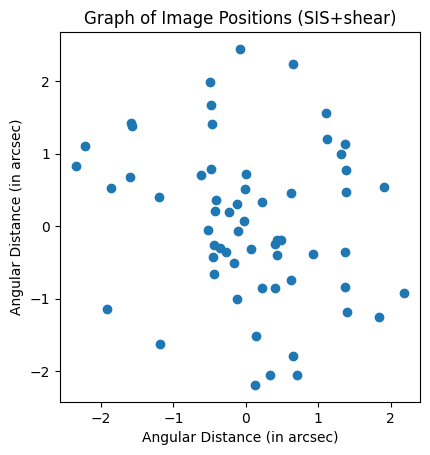

In [39]:
imX_shear = [];
imY_shear = [];


for i in typeLens["single"]:
    elem = vals_shear[i]["img"]
    imX_shear.append(elem[0][0])
    imY_shear.append(elem[0][1])

for i in typeLens["double"]:
    elem = vals_shear[i]["img"]
    imX_shear.append(elem[0][0])
    imX_shear.append(elem[1][0])
    imY_shear.append(elem[0][1])
    imY_shear.append(elem[1][1])
    
for i in typeLens["quad"]:
    elem = vals_shear[i]["img"]
    imX_shear.append(elem[0][0])
    imX_shear.append(elem[1][0])
    imX_shear.append(elem[2][0])
    imX_shear.append(elem[3][0])
    
    imY_shear.append(elem[0][1])
    imY_shear.append(elem[1][1])
    imY_shear.append(elem[2][1])
    imY_shear.append(elem[3][1])

newX_shear = np.array(imX_shear)
newY_shear = np.array(imY_shear)

plt.scatter(newX_shear, newY_shear)

betaOne_shear = [vals_shear[i]["betaOne"] for i in range(len(vals_shear))]
betaTwo_shear = [vals_shear[i]["betaTwo"] for i in range(len(vals_shear))]

plt.gca().set_aspect('equal')

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Image Positions (SIS+shear)')


Text(0.5, 1.0, 'Graph of Source Positions (SIS+shear)')

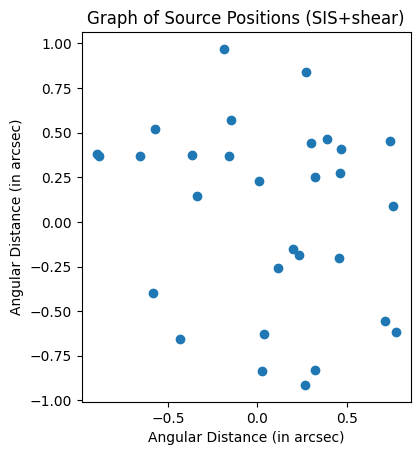

In [40]:
plt.scatter(betaOne_shear,betaTwo_shear)
plt.gca().set_aspect('equal')

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Source Positions (SIS+shear)')

Text(0.5, 1.0, 'Graph of Source and Image Positions Overlayed (SIS+shear)')

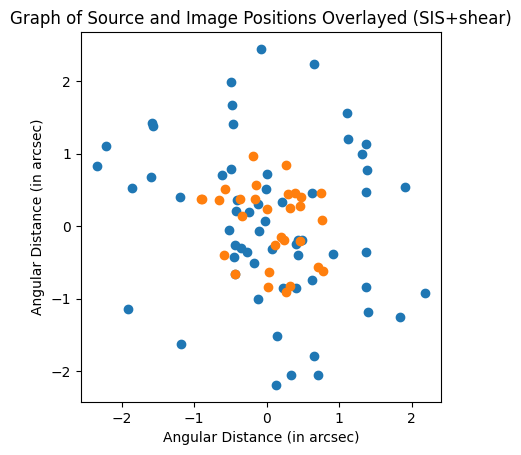

In [41]:
plt.scatter(newX_shear, newY_shear)
plt.scatter(betaOne_shear,betaTwo_shear)
plt.gca().set_aspect('equal')

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Source and Image Positions Overlayed (SIS+shear)')

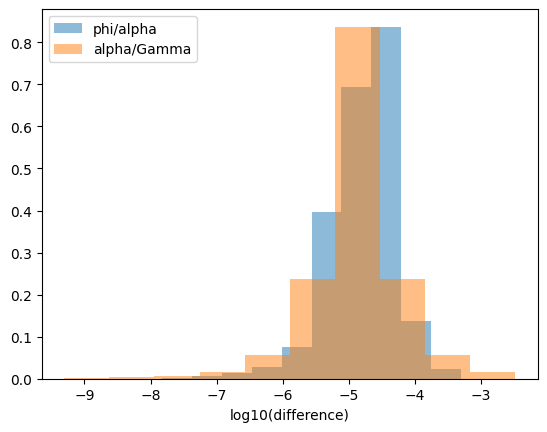

c:\Users\satya\Documents\GravLensing\pygravlens.py:1571: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


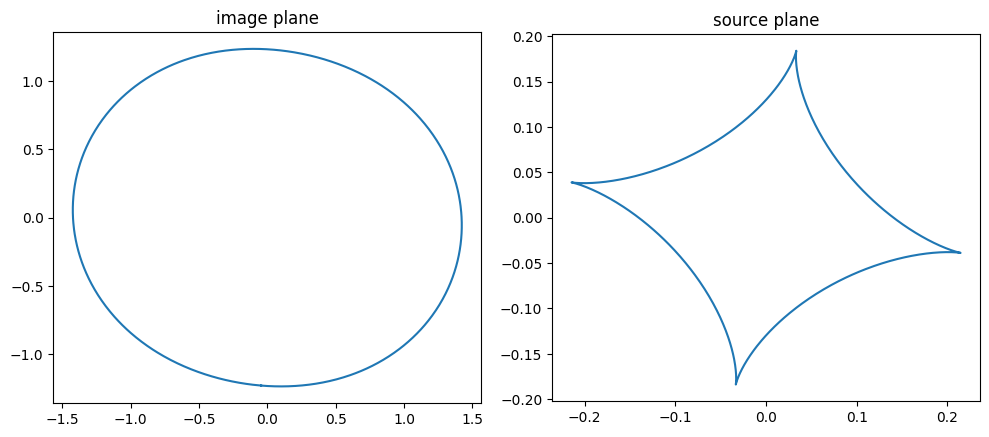

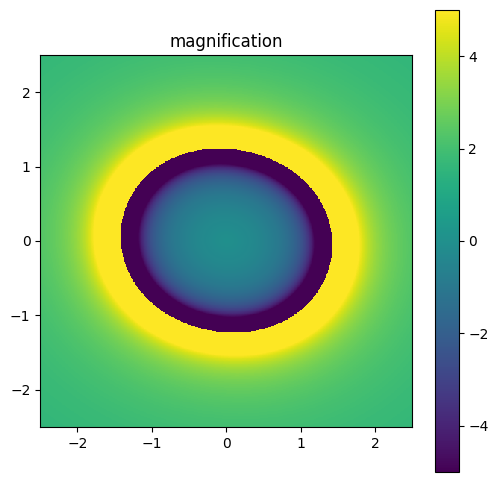

c:\Users\satya\Documents\GravLensing\pygravlens.py:1641: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


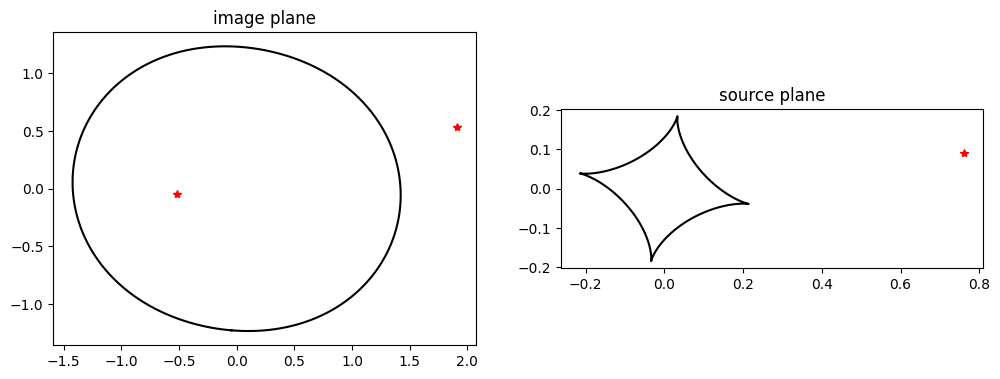

In [42]:
# Arbitrary point chosen from above list of points to graph.

betaOne = betaOne_shear[26]
betaTwo = betaTwo_shear[26] # choose
betaArray= [betaOne, betaTwo] 

eins = [vals_shear[i]["einrad"] for i in range(len(vals_shear))]

# array of randomized shear vals between 0 and 0.1, same size as eins array
gc = [vals_shear[i]["gammc"] for i in range(len(vals_shear))]
gs = [vals_shear[i]["gamms"] for i in range(len(vals_shear))]
 
ellip = 0.0

xtmp_elpow = np.random.uniform(low=-2,high=2,size=(1000,2))

plane_elpow = gl.lensplane('ellpow',[0.0,0.0,1.0,eins[26],ellip,ellip],gammac=gc[26],gammas=gs[26])
plane_elpow.check(xtmp_elpow)

model_elpow = gl.lensmodel([plane_elpow])
model_elpow.tile()
model_elpow.plotcrit()
model_elpow.plotmag()

imgarr,muarr,tarr = model_elpow.findimg(betaArray)
model_elpow.plot(src=betaArray)



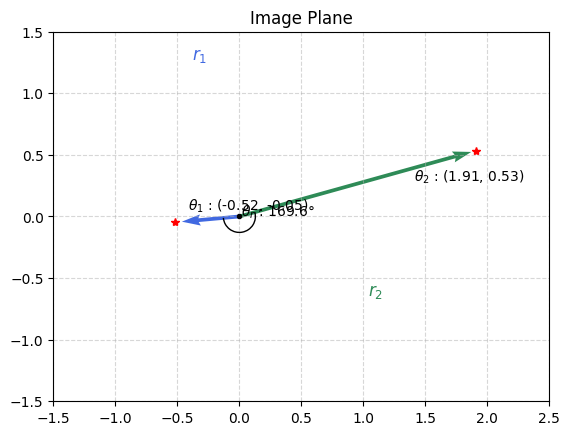

In [43]:
fig2,ax2 = plt.subplots()
x_lim = ax2.set_xlim(-1.5,2.5)
y_lim = ax2.set_ylim(-1.5,1.5)

r_im1 = np.array(imgarr[0])
r_im2 = np.array(imgarr[1])
v_orig = np.array(imgarr)

# reducing the size of vectors for clarity of eyes
v_orig[0] = 0.98*v_orig[0]
v_orig[1] = 0.9*v_orig[1]

V = v_orig.T
origin = np.array([[0,0],[0,0]]).T

cos_theta = np.dot(r_im1, r_im2) / (np.linalg.norm(r_im1) * np.linalg.norm(r_im2))
theta_rad = np.arccos(np.clip(cos_theta, -1, 1))  # Clip to avoid numerical errors
theta_deg = np.degrees(theta_rad)  # Convert to degrees

ax2.plot(0, 0, marker='.',color='black')
ax2.plot(r_im2[0], r_im2[1], marker='*',color='red', label=f'Image 1: ({r_im2[0]:.2f}, {r_im2[1]:.2f})')
ax2.plot(r_im1[0], r_im1[1], marker='*',color='red', label=f'Image 2: ({r_im1[0]:.2f}, {r_im1[1]:.2f})')


# Get vector angles for proper arc placement
angle1 = np.degrees(np.arctan2(r_im1[1], r_im1[0]))
angle2 = np.degrees(np.arctan2(r_im2[1], r_im2[0]))

# Add angle arc (radius = min vector length * 0.5)
radius = 0.25 * min(np.linalg.norm(r_im1), np.linalg.norm(r_im2))  # Reduced radius
arc = Arc((0, 0), 2*radius, 2*radius, angle=0,
          theta1=min(angle1, angle2), theta2=max(angle1, angle2),
          color='black', lw=1, zorder=3)
ax2.add_patch(arc)


# Add coordinate labels 
plt.text(r_im1[0]-0.5, r_im1[1] - 0.25, r'$\theta_2$ : ' + f'({r_im1[0]:.2f}, {r_im1[1]:.2f})', fontsize=10)
plt.text(r_im2[0] + 0.1, r_im2[1]+0.1, r'$\theta_1$ : ' + f'({r_im2[0]:.2f}, {r_im2[1]:.2f})', fontsize=10)

mid_angle = (angle1 + angle2)/2
label_x = 0.5 * radius * np.cos(np.radians(mid_angle))
label_y = 0.5 * radius * np.sin(np.radians(mid_angle))
ax2.text(label_x + 0.3, label_y+0.1, r'$\theta_r$ : ' + f'{theta_deg:.1f}°', 
        color='black', fontsize=10, ha='center', va='center')
# vector plot
ax2.quiver(origin[0], origin[1], V[0], V[1], color=['seagreen', 'royalblue'], angles='xy', scale_units='xy', scale=1)

ax2.text(v_orig[0][0] - 2.25, v_orig[0][1] + 0.75, r'$r_1$',size=12,color='royalblue')
ax2.text(v_orig[1][0] + 1.5, v_orig[1][1] - 0.60, r'$r_2$',size=12,color='seagreen')

#labels
ax2.grid(linestyle='--', alpha=0.5)
#ax2.legend(loc='best')  # Show legend with coordinates
plt.title("Image Plane")
# model_elpow.plot(src=betaArray)
plt.show()


In [44]:
print("src: ", betaArray, "\n")
print("image: ", imgarr, "\n")
print("mag: ", muarr, "\n")
print("time del: ", tarr, "\n")

src:  [np.float64(0.7616203363929777), np.float64(0.08976093499101379)] 

image:  [[ 1.90850195  0.53464865]
 [-0.51525442 -0.04692155]] 

mag:  [ 3.35737869 -0.58143292] 

time del:  [0.         1.91418089] 



In [45]:
def unit_vector(vector):
    # Returns the unit vector of the vector.  
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    # Returns the angle in radians between vectors 'v1' and 'v2'
    
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

#### Corner Plots for SIS+shear

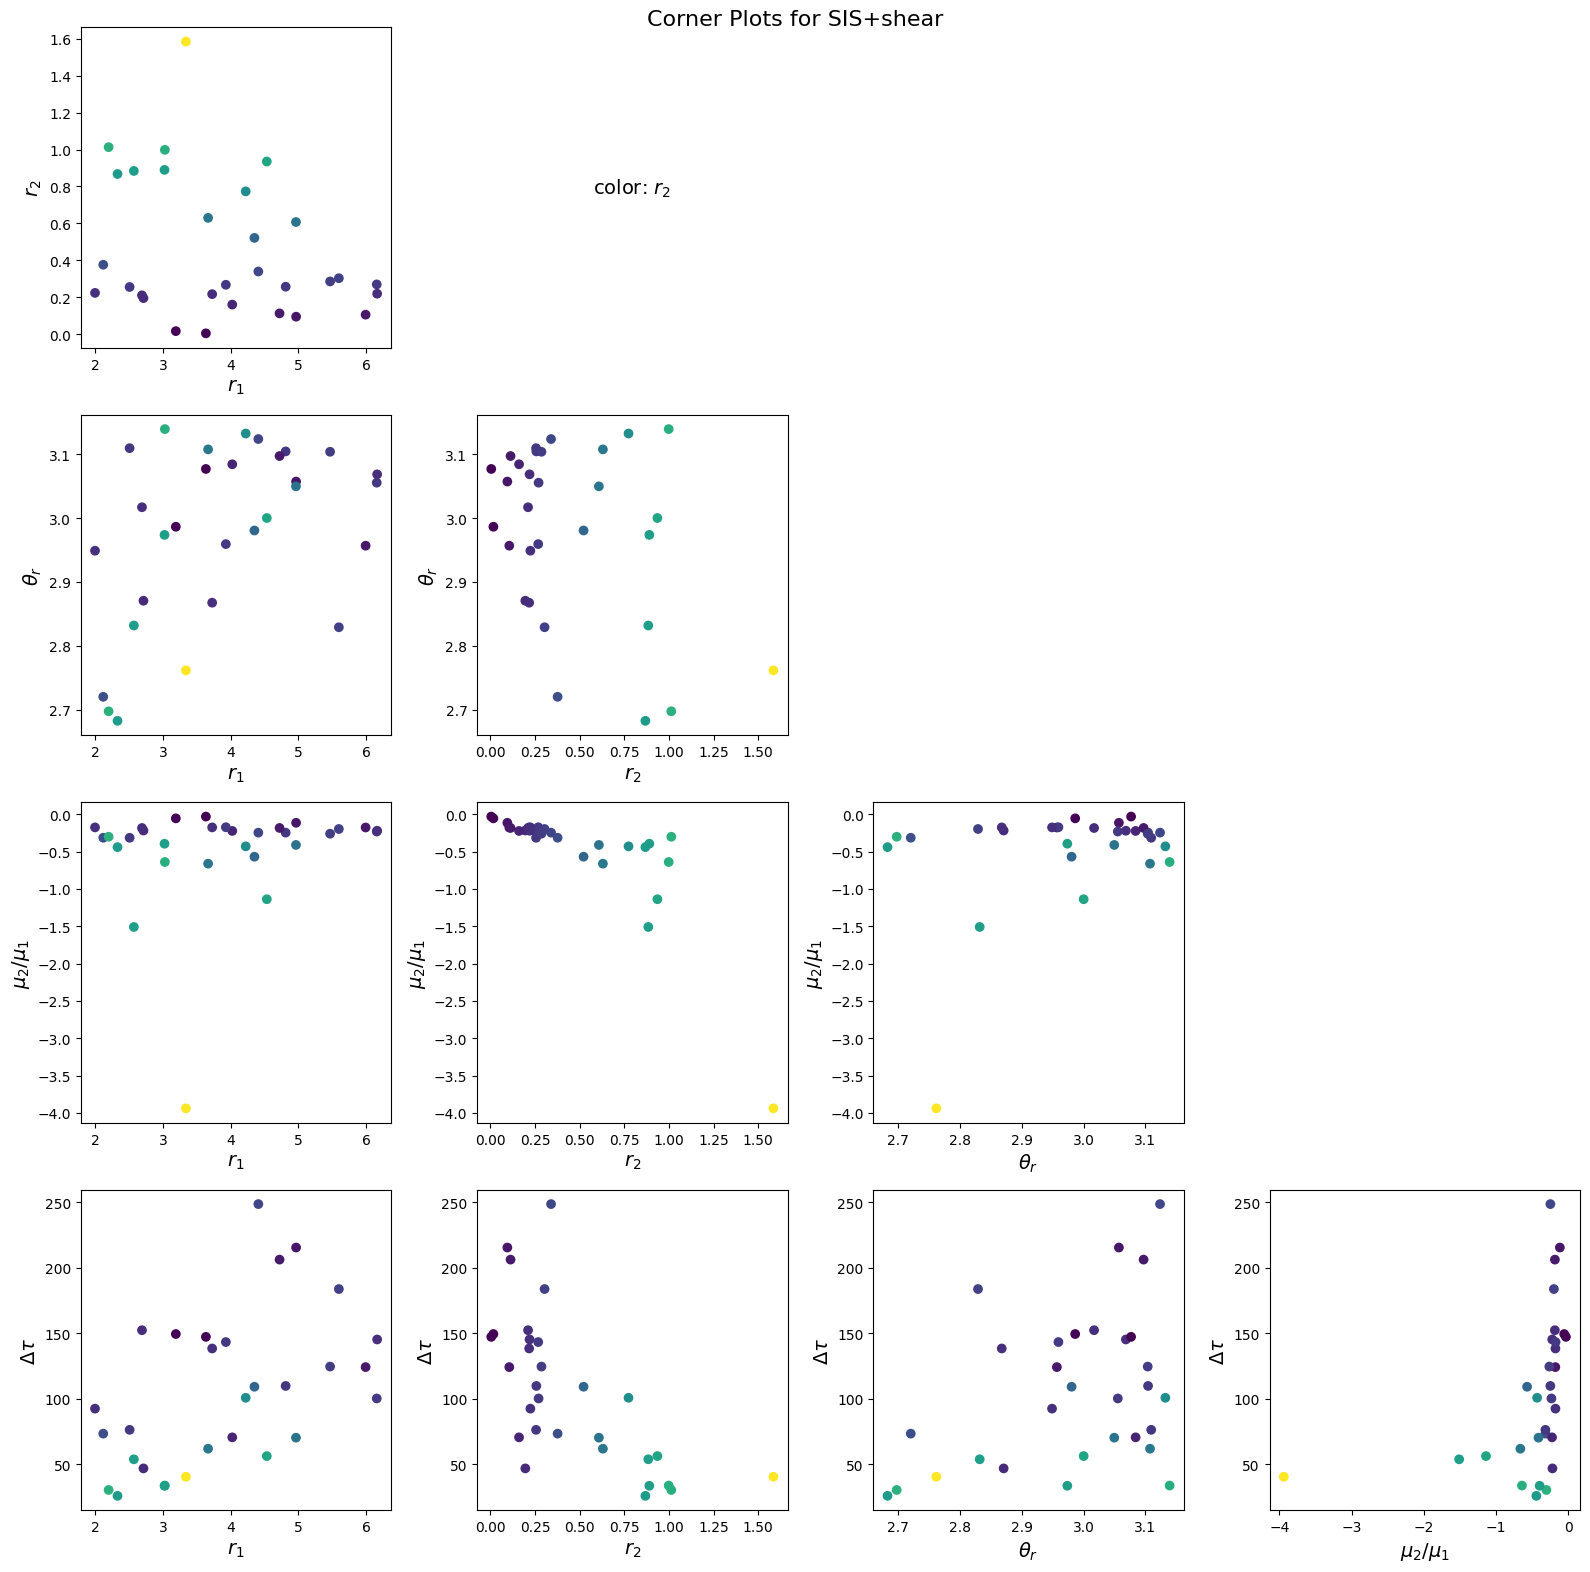

In [46]:
r_1 = [];
r_2 = [];

for i in typeLens["double"]:
    elem = vals_shear[i]["img"]
    r_1.append(elem[0])
    r_2.append(elem[1])

theta_r = [];
for i in range(len(r_1)):
    theta_r.append(angle_between(r_1[i], r_2[i]))

R_1 = np.array([r_1[i][0]**2 + r_1[i][1]**2 for i in range(len(r_1))])
R_2 = np.array([r_2[i][0]**2 + r_2[i][1]**2 for i in range(len(r_2))])

mu_1 = np.array([vals_shear[i]["mu"][0] for i in typeLens["double"]])
mu_2 = np.array([vals_shear[i]["mu"][1] for i in typeLens["double"]])

ratio_mag = mu_2 / mu_1

timeDel_1 = np.array([vals_shear[i]["time"][0].value for i in typeLens["double"]]) # this is always zero, so only second is interesting
timeDel_2 = np.array([vals_shear[i]["time"][1].value for i in typeLens["double"]]) # second on is more interesting so would be focus.

tau = timeDel_2 - timeDel_1

### Time delay distance

z_l = np.array([vals_shear[i]["zLens"] for i in typeLens["double"]])
z_s = np.array([vals_shear[i]["zSrc"] for i in typeLens["double"]])

Dlens = [];
Dsrc = [];

for i in range(len(z_l)):
    Dlens.append(cosmo.comoving_distance(z_l[i]).value);
    Dsrc.append(cosmo.comoving_distance(z_s[i]).value);
    
D_l = np.array(Dlens)
D_s = np.array(Dsrc)

D_t = (D_l * D_s ) / (D_s - D_l) 

data = np.column_stack((R_1, R_2, theta_r, ratio_mag, tau)) # takes multiple arrays and stacks them on top of each other.
#r_1 refers to radius of image 1 and r_2 refers to radius of image 2.
visualize_data(data, 1, ['$r_1$', '$r_2$', r'$\theta_r$',r'$\mu_2 / \mu_1$',r'$\Delta\tau$'], 'Corner Plots for SIS+shear') 


### Ellipticity Only

In [47]:
vals_ellip = np.load('valEllip.npy', allow_pickle = True)

In [48]:
# printing out specificed dictionary values for img, magnification, and time-delay arrays
for i in range(len(vals_ellip)):
    print('Here is the image array: \n', vals_ellip[i]["img"], '\n')
    print('Here is the magnification array: \n', vals_ellip[i]["mu"], '\n')
    print('Here is the time delay array: \n', vals_ellip[i]["time"], '\n')
    '''
    print('Here is the ellip_c array: \n', values[i]["ellipc"], '\n')
    print('Here is the ellip_s array: \n', values[i]["ellips"], '\n')
    print('Here is the gamma_c array: \n', values[i]["gammc"], '\n')
    print('Here is the gamma_s array: \n', values[i]["gamms"], '\n')
    print()
    '''
    print('----------------------------Next Mock Lens----------------------------')
    
# note that the values dictionary contains i elements where i represents the number of mock lenses

# now we define a separate dictionary containing keys as "single," "double," or "quad" 
# with values as the index of the mock lens for single, double, and quad lenses respectively

single = [];
double = [];
quad = [];

weirdCase = []
for i in range(len(vals_ellip)):
    size = len(vals_ellip[i]["img"]);
    neither = {}
    if size == 4:
        quad.append(i)
    elif size == 2:
        double.append(i)
    elif size == 1:
        single.append(i)
    else:
        neither = dict(index = i, size = size)
    weirdCase.append(neither)

typeLens_ellip = dict(single = single, double = double, quad = quad)

print("The index array for a single image producing mock lens is: ", typeLens_ellip["single"],'\n')
print("The index array for a double image producing mock lens is: ", typeLens_ellip["double"],'\n')
print("The index array for a quad image producing mock lens is: ", typeLens_ellip["quad"],'\n')

for j in weirdCase:
    sz = len(j)
    if sz != 0:
        print("The index for neither single, double, or quad is: ", j["index"],'\n')
        print("And the images produced by this lens are: ", j["size"],'\n')
        print('----------------------------Next Non Single, Double, or Quad Mock Lens----------------------------')

Here is the image array: 
 [[ 1.15665167  0.93817381]
 [-0.54011344 -0.39715062]] 

Here is the magnification array: 
 [ 3.94413012 -1.51420279] 

Here is the time delay array: 
 [ 0.         75.92747689] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.57047619  0.70832725]
 [-0.49479174 -0.39793365]] 

Here is the magnification array: 
 [ 2.67170522 -1.296167  ] 

Here is the time delay array: 
 [ 0.         86.66480564] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[-2.19381623  1.09958394]
 [ 0.46374372 -0.70949698]] 

Here is the magnification array: 
 [ 2.59629681 -0.83139145] 

Here is the time delay array: 
 [  0.         318.63759056] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.74828472  0.97058294]
 [-0.20965187 -0.14182137]] 

Here is the magnification array: 
 [ 2.04704259 -0.32522644] 

Here is the

#### Visualizing Ellipticity-Only Data

Text(0.5, 1.0, 'Graph of Image Positions (SIE)')

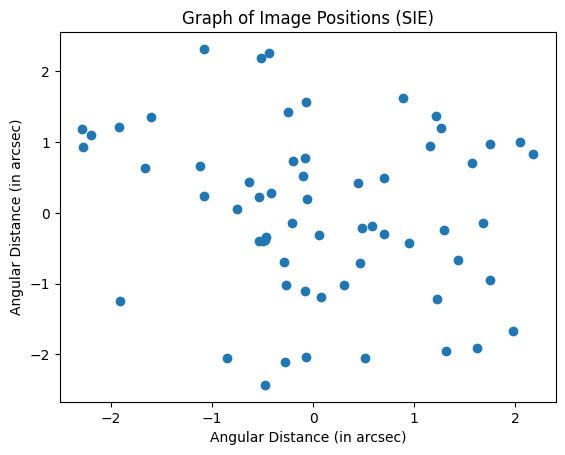

In [49]:
imX_ellip = [];
imY_ellip = [];

for i in typeLens_ellip["single"]:
    elem = vals_ellip[i]["img"]
    imX_ellip.append(elem[0][0])
    imY_ellip.append(elem[0][1])

for i in typeLens_ellip["double"]:
    elem = vals_ellip[i]["img"]
    imX_ellip.append(elem[0][0])
    imX_ellip.append(elem[1][0])
    imY_ellip.append(elem[0][1])
    imY_ellip.append(elem[1][1])
    
for i in typeLens_ellip["quad"]:
    elem = vals_ellip[i]["img"]
    imX_ellip.append(elem[0][0])
    imX_ellip.append(elem[1][0])
    imX_ellip.append(elem[2][0])
    imX_ellip.append(elem[3][0])
    
    imY_ellip.append(elem[0][1])
    imY_ellip.append(elem[1][1])
    imY_ellip.append(elem[2][1])
    imY_ellip.append(elem[3][1])
    

newX_ellip = np.array(imX_ellip)
newY_ellip = np.array(imY_ellip)

plt.scatter(newX_ellip, newY_ellip)

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Image Positions (SIE)')


Text(0.5, 1.0, 'Graph of Source Positions (SIE)')

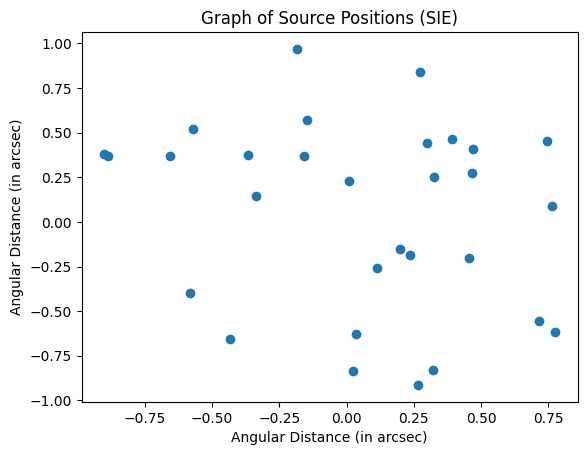

In [50]:
betaOne_ellip = [vals_ellip[i]["betaOne"] for i in range(len(vals_ellip))]
betaTwo_ellip = [vals_ellip[i]["betaTwo"] for i in range(len(vals_ellip))]
plt.scatter(betaOne_ellip,betaTwo_ellip)

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Source Positions (SIE)')

#### Corner Plots for SIE

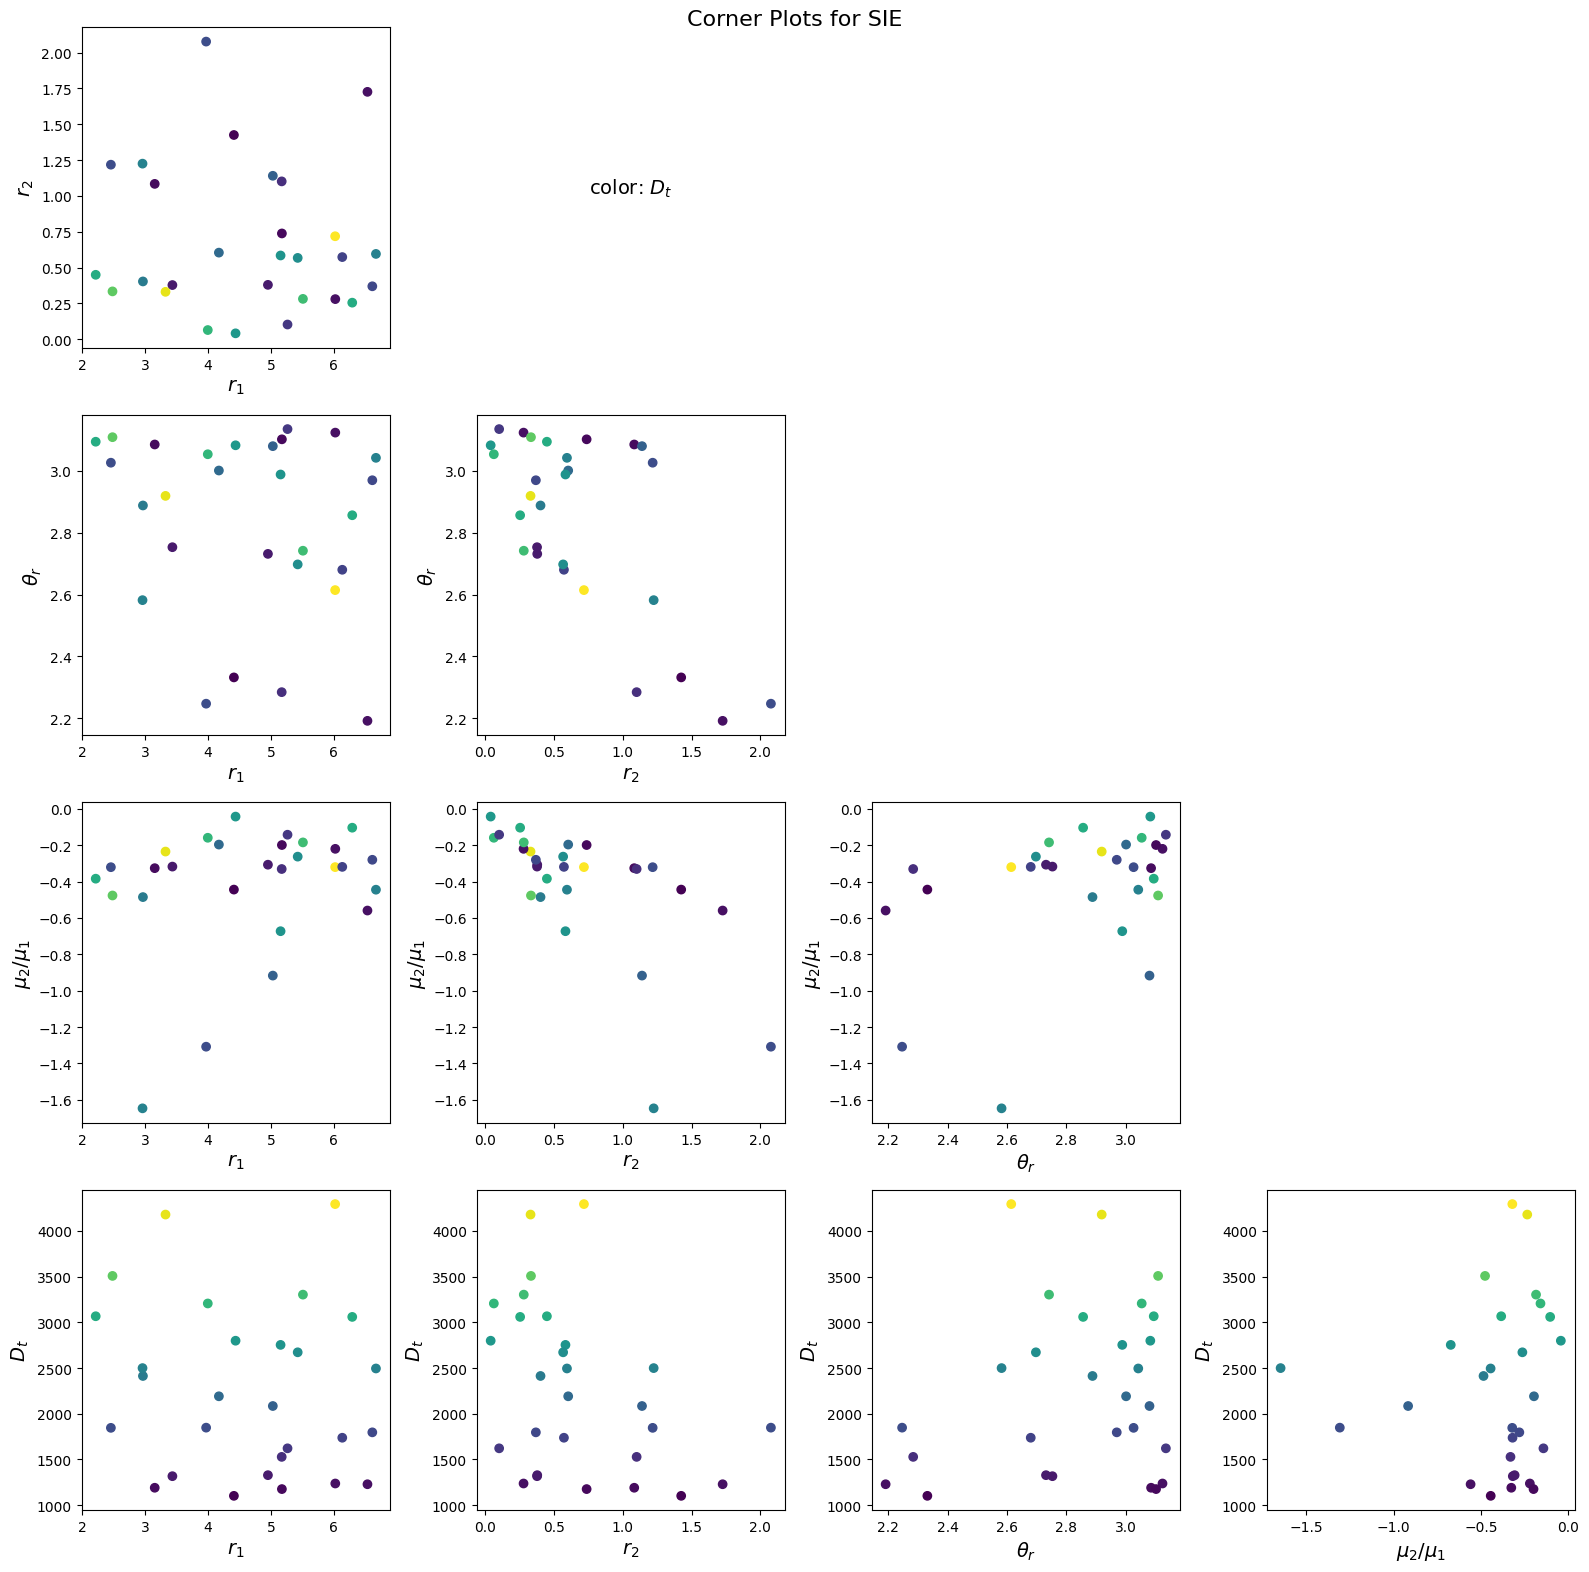

In [51]:
r_1 = [];
r_2 = [];

for i in typeLens_ellip["double"]:
    elem = vals_ellip[i]["img"]
    r_1.append(elem[0])
    r_2.append(elem[1])

theta_r = [];
for i in range(len(r_1)):
    theta_r.append(angle_between(r_1[i], r_2[i]))

R_1 = np.array([r_1[i][0]**2 + r_1[i][1]**2 for i in range(len(r_1))])
R_2 = np.array([r_2[i][0]**2 + r_2[i][1]**2 for i in range(len(r_2))])

mu_1 = np.array([vals_ellip[i]["mu"][0] for i in typeLens_ellip["double"]])
mu_2 = np.array([vals_ellip[i]["mu"][1] for i in typeLens_ellip["double"]])

ratio_mag = mu_2 / mu_1

timeDel_1 = np.array([vals_ellip[i]["time"][0].value for i in typeLens_ellip["double"]]) # this is always zero, so only second is interesting
timeDel_2 = np.array([vals_ellip[i]["time"][1].value for i in typeLens_ellip["double"]]) # second on is more interesting so would be focus.

tau = timeDel_2 - timeDel_1

### Time delay distance

z_l = np.array([vals_ellip[i]["zLens"] for i in typeLens_ellip["double"]])
z_s = np.array([vals_ellip[i]["zSrc"] for i in typeLens_ellip["double"]])

Dlens = [];
Dsrc = [];

for i in range(len(z_l)):
    Dlens.append(cosmo.comoving_distance(z_l[i]).value);
    Dsrc.append(cosmo.comoving_distance(z_s[i]).value);
    
D_l = np.array(Dlens)
D_s = np.array(Dsrc)

D_t = (D_l * D_s ) / (D_s - D_l) 

data = np.column_stack((R_1, R_2, theta_r, ratio_mag, D_t)) # takes multiple arrays and stacks them on top of each other.
#r_1 refers to radius of image 1 and r_2 refers to radius of image 2.
visualize_data(data, 4,['$r_1$', '$r_2$', r'$\theta_r$',r'$\mu_2 / \mu_1$', r'$D_t$'], 'Corner Plots for SIE')

### Ellipticity & Shear

In [52]:
vals_both = np.load('valBoth.npy', allow_pickle = True)

In [53]:
# printing out specificed dictionary values for img, magnification, and time-delay arrays
for i in range(len(vals_both)):
    print('Here is the image array: \n', vals_both[i]["img"], '\n')
    print('Here is the magnification array: \n', vals_both[i]["mu"], '\n')
    print('Here is the time delay array: \n', vals_both[i]["time"], '\n')
    '''
    print('Here is the ellip_c array: \n', values[i]["ellipc"], '\n')
    print('Here is the ellip_s array: \n', values[i]["ellips"], '\n')
    print('Here is the gamma_c array: \n', values[i]["gammc"], '\n')
    print('Here is the gamma_s array: \n', values[i]["gamms"], '\n')
    print()
    '''
    print('----------------------------Next Mock Lens----------------------------')
    
# note that the values dictionary contains i elements where i represents the number of mock lenses

# now we define a separate dictionary containing keys as "single," "double," or "quad" 
# with values as the index of the mock lens for single, double, and quad lenses respectively

single = [];
double = [];
quad = [];

weirdCase = []
for i in range(len(vals_both)):
    size = len(vals_both[i]["img"]);
    neither = {}
    if size == 4:
        quad.append(i)
    elif size == 2:
        double.append(i)
    elif size == 1:
        single.append(i)
    else:
        neither = dict(index = i, size = size)
    weirdCase.append(neither)

typeLens_both = dict(single = single, double = double, quad = quad)

print("The index array for a single image producing mock lens is: ", typeLens_both["single"],'\n')
print("The index array for a double image producing mock lens is: ", typeLens_both["double"],'\n')
print("The index array for a quad image producing mock lens is: ", typeLens_both["quad"],'\n')

for j in weirdCase:
    sz = len(j)
    if sz != 0:
        print("The index for neither single, double, or quad is: ", j["index"],'\n')
        print("And the images produced by this lens are: ", j["size"],'\n')
        print('----------------------------Next Non Single, Double, or Quad Mock Lens----------------------------')

Here is the image array: 
 [[ 1.40033685  0.46181202]
 [-0.47242885 -0.42203269]] 

Here is the magnification array: 
 [ 4.17233495 -1.15200124] 

Here is the time delay array: 
 [ 0.         74.44590398] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.58607554  0.67237922]
 [-0.48885572 -0.40067627]] 

Here is the magnification array: 
 [ 2.65892444 -1.26415039] 

Here is the time delay array: 
 [ 0.        86.7097609] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[-2.20566843  1.01037147]
 [ 0.45818411 -0.69589509]] 

Here is the magnification array: 
 [ 2.6472735  -0.78314767] 

Here is the time delay array: 
 [  0.         315.17496367] d 

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.51780863  1.11644129]
 [-0.19945722 -0.12978095]] 

Here is the magnification array: 
 [ 2.43144202 -0.2768975 ] 

Here is the t

#### Visualizing Shear+Ellipticity Data

Text(0.5, 1.0, 'Graph of Image Positions (SIE+shear)')

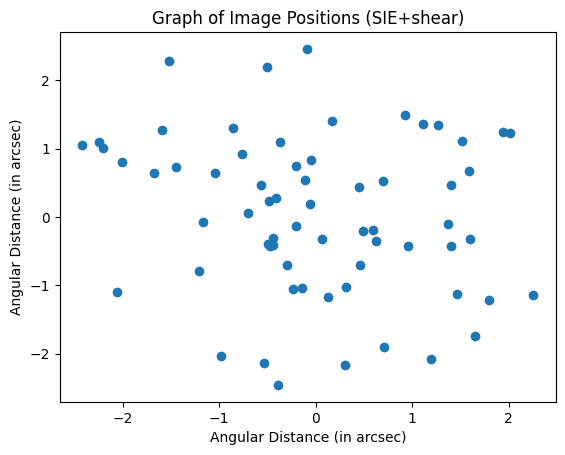

In [54]:
imX_both = [];
imY_both = [];

for i in typeLens_both["single"]:
    elem = vals_both[i]["img"]
    imX_both.append(elem[0][0])
    imY_both.append(elem[0][1])

for i in typeLens_both["double"]:
    elem = vals_both[i]["img"]
    imX_both.append(elem[0][0])
    imX_both.append(elem[1][0])
    imY_both.append(elem[0][1])
    imY_both.append(elem[1][1])
    
for i in typeLens_both["quad"]:
    elem = vals_both[i]["img"]
    imX_both.append(elem[0][0])
    imX_both.append(elem[1][0])
    imX_both.append(elem[2][0])
    imX_both.append(elem[3][0])
    
    imY_both.append(elem[0][1])
    imY_both.append(elem[1][1])
    imY_both.append(elem[2][1])
    imY_both.append(elem[3][1])

newX_both = np.array(imX_both)
newY_both = np.array(imY_both)

plt.scatter(newX_both, newY_both)

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Image Positions (SIE+shear)')


Text(0.5, 1.0, 'Graph of Source Positions (SIE+shear)')

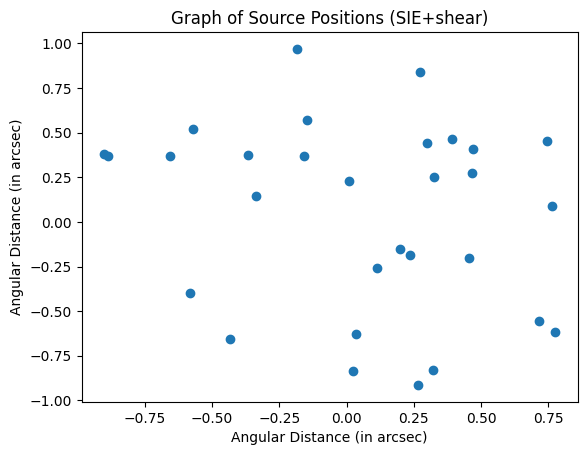

In [55]:
betaOne_both = [vals_both[i]["betaOne"] for i in range(len(vals_both))]
betaTwo_both = [vals_both[i]["betaTwo"] for i in range(len(vals_both))]
plt.scatter(betaOne_both,betaTwo_both)

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Source Positions (SIE+shear)')

#### Corner Plots for SIE+shear

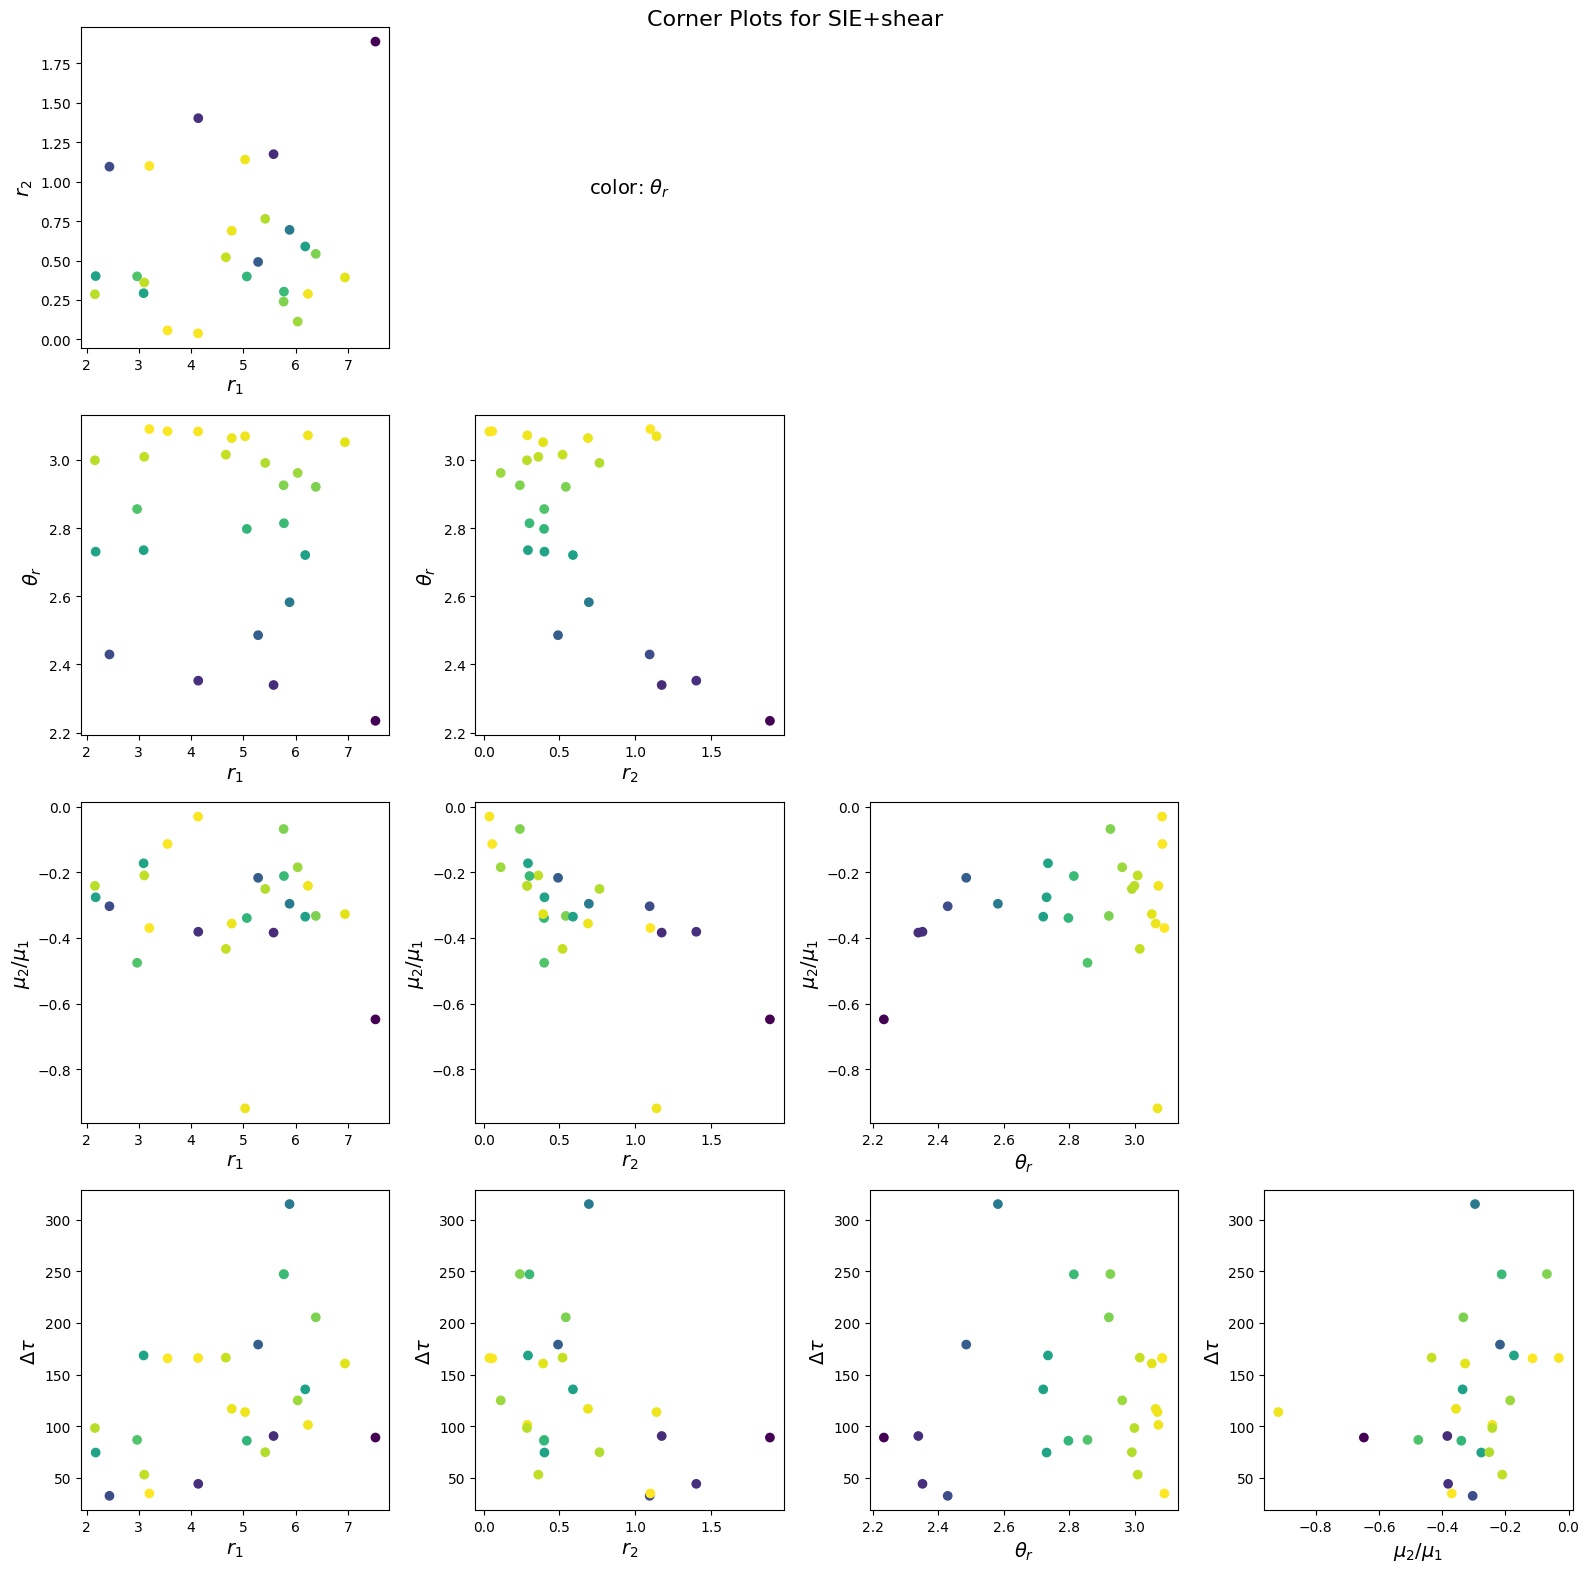

In [56]:
r_1 = [];
r_2 = [];

for i in typeLens_both["double"]:
    elem = vals_both[i]["img"]
    r_1.append(elem[0])
    r_2.append(elem[1])

theta_r = [];
for i in range(len(r_1)):
    theta_r.append(angle_between(r_1[i], r_2[i]))

R_1 = np.array([r_1[i][0]**2 + r_1[i][1]**2 for i in range(len(r_1))])
R_2 = np.array([r_2[i][0]**2 + r_2[i][1]**2 for i in range(len(r_2))])

mu_1 = np.array([vals_both[i]["mu"][0] for i in typeLens_both["double"]])
mu_2 = np.array([vals_both[i]["mu"][1] for i in typeLens_both["double"]])

ratio_mag = mu_2 / mu_1

timeDel_1 = np.array([vals_both[i]["time"][0].value for i in typeLens_both["double"]]) # this is always zero, so only second is interesting
timeDel_2 = np.array([vals_both[i]["time"][1].value for i in typeLens_both["double"]]) # second on is more interesting so would be focus.

tau = timeDel_2 - timeDel_1

### Time delay distance

z_l = np.array([vals_ellip[i]["zLens"] for i in typeLens_ellip["double"]])
z_s = np.array([vals_ellip[i]["zSrc"] for i in typeLens_ellip["double"]])

Dlens = [];
Dsrc = [];

for i in range(len(z_l)):
    Dlens.append(cosmo.comoving_distance(z_l[i]).value);
    Dsrc.append(cosmo.comoving_distance(z_s[i]).value);
    
D_l = np.array(Dlens)
D_s = np.array(Dsrc)

D_t = (D_l * D_s ) / (D_s - D_l) 

data = np.column_stack((R_1, R_2, theta_r, ratio_mag, tau)) # takes multiple arrays and stacks them on top of each other.
#r_1 refers to radius of image 1 and r_2 refers to radius of image 2.
visualize_data(data, 2, ['$r_1$', '$r_2$', r'$\theta_r$',r'$\mu_2 / \mu_1$',r'$\Delta\tau$'], 'Corner Plots for SIE+shear') 